<a href="https://colab.research.google.com/github/JMML2021/Tasca-M5-T01-Exercicis-d-Hipotesis-Testing./blob/main/Tasca_M5_T01_Exercicis_d'Hipotesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exercicis d'Hipotesis Testing.**



## Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

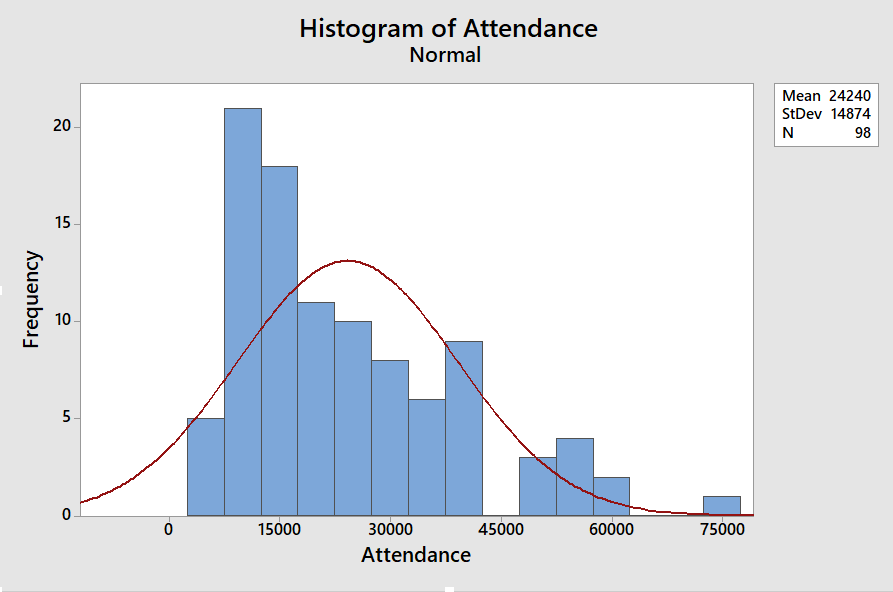

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


State your research hypothesis as a null hypothesis and alternate hypothesis (Ho) and (Ha or H1).
Collect data in a way designed to test the hypothesis.
Perform an appropriate statistical test.
Decide whether to reject or fail to reject your null hypothesis.
Present the findings in your results and discussion section.

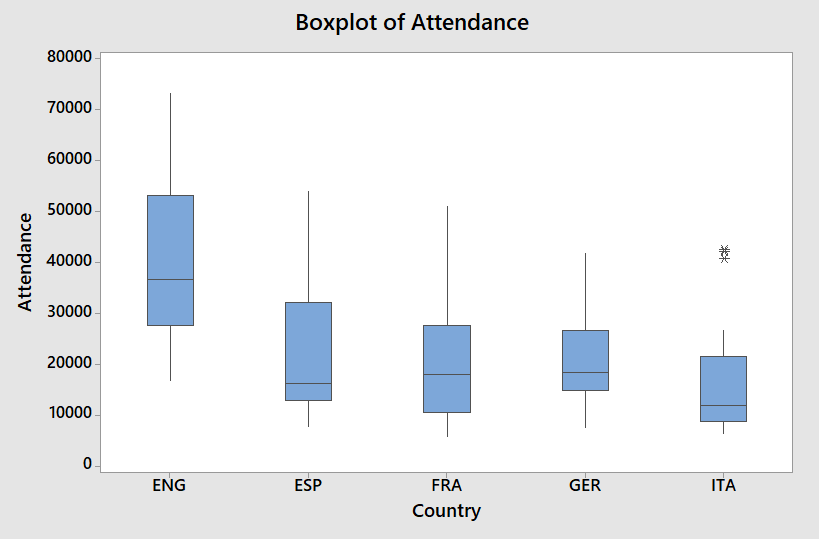

https://www.scribbr.com/statistics/hypothesis-testing/

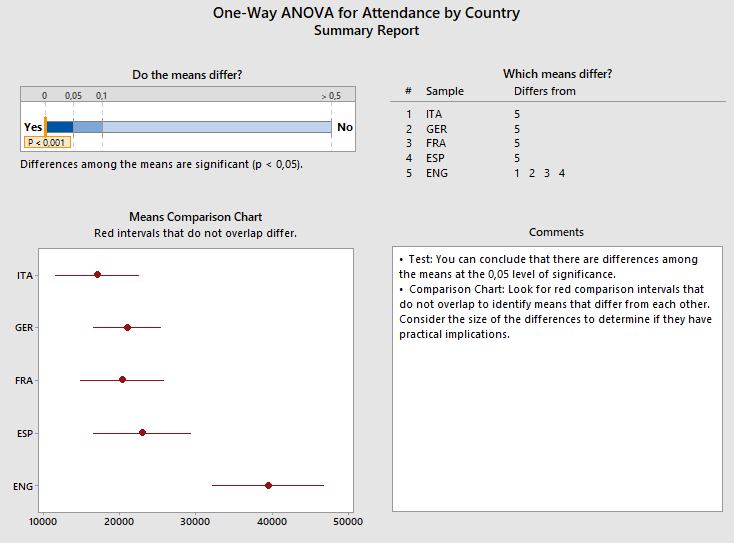

In [2]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [3]:
# Abro el fichero una vez adecuado

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/Lligues europees UEFA.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=';', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
df1.iloc[0]

Hay  98 filas con 21 columnas


Rk                                    1
Squad                   Manchester City
Country                             ENG
LgRk                                  1
MP                                   37
W                                    28
D                                     6
L                                     3
GF                                   96
GA                                   24
GD                                   72
Pts                                  90
Pts/G                              2.43
xG                                 86.1
xGA                                26.8
xGD                                59.3
xGD/90                              1.6
Last 5                        W W W W D
Attendance                        52739
Top Team Scorer    Kevin De Bruyne - 15
Goalkeeper                      Ederson
Name: 0, dtype: object

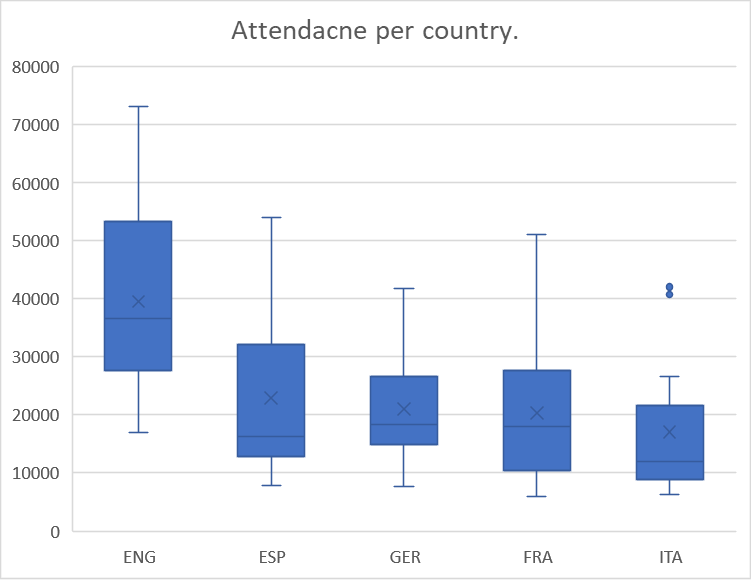

In [ ]:
df1.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


APIS
https://github.com/aina1997/MasterClassDS/blob/main/API_Python/API_Rest_%2B_Python.ipynb

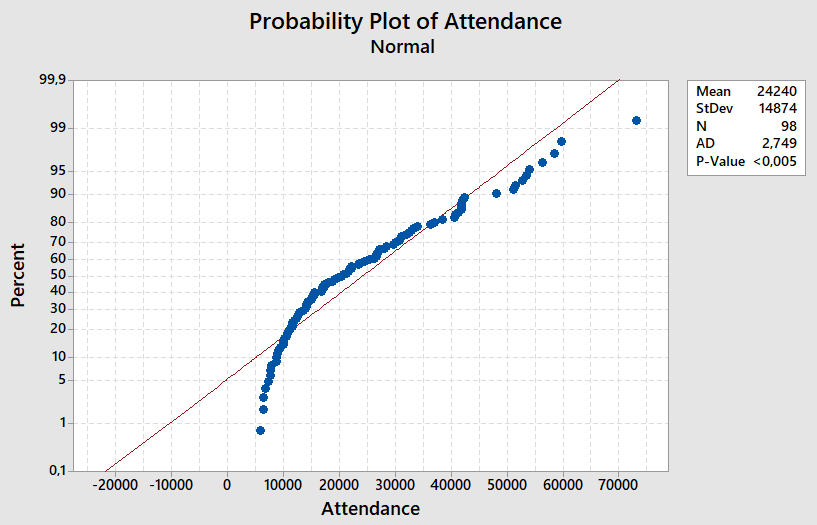

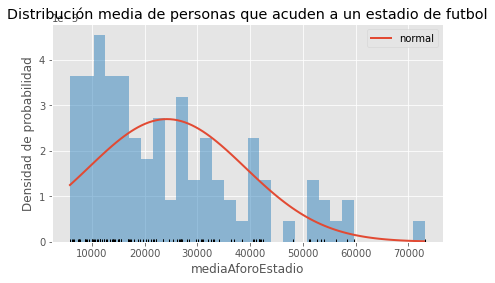

In [10]:
# Histograma + curva normal teórica
# ==============================================================================
mediaAforoEstadio =df['Attendance']
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(mediaAforoEstadio)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(mediaAforoEstadio), max(mediaAforoEstadio), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=mediaAforoEstadio, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(mediaAforoEstadio, np.full_like(mediaAforoEstadio, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución media de personas que acuden a un estadio de futbol')
ax.set_xlabel('mediaAforoEstadio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

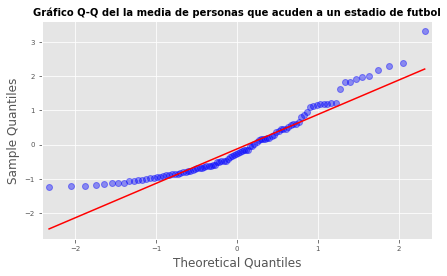

In [11]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    mediaAforoEstadio,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del la media de personas que acuden a un estadio de futbol', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

asimetría y curtosis



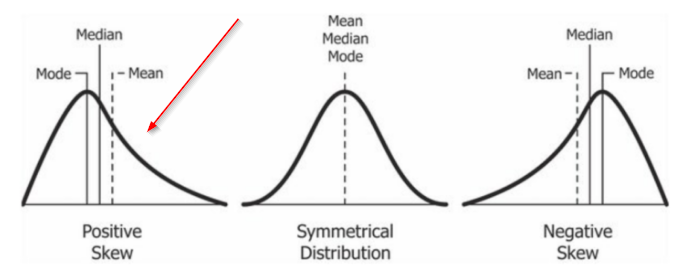

In [12]:
print('Kursotis:', stats.kurtosis(mediaAforoEstadio))
print('Skewness:', stats.skew(mediaAforoEstadio))

Kursotis: 0.3226833402164071
Skewness: 0.9750885684272312


In [13]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(mediaAforoEstadio)
shapiro_test

(0.9071443676948547, 3.799384103331249e-06)